In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sys 
sys.path.insert(0, '../src/')
import jsm_prephalo
import jsm_stats
import corner
import pygtc

In [24]:
init = jsm_prephalo.MassMat("../../data/MW-analog/10k_psi3_phi4/")
init.prep_data(clean_host=False)

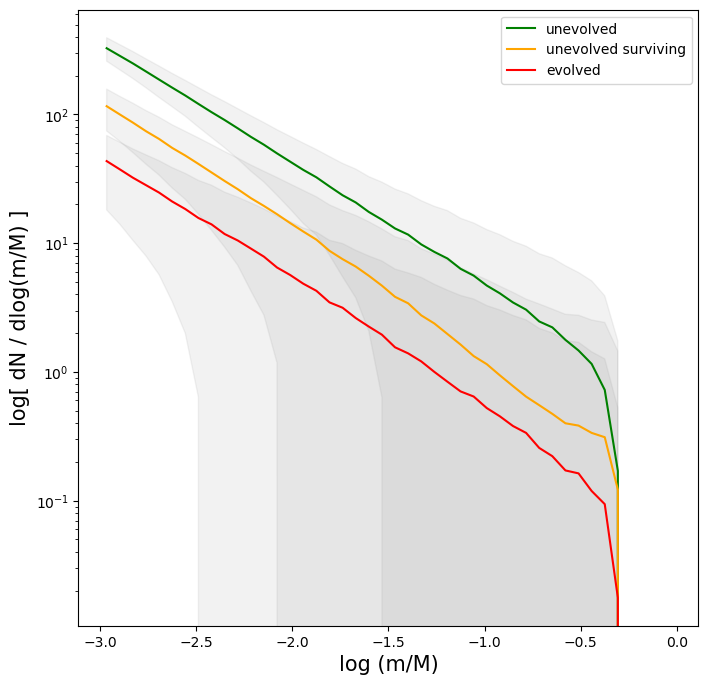

In [25]:
init.SHMF(plot=True)
init.SAGA_break()

In [26]:
init.SAGA_break()

In [27]:
# surv_mass = np.ma.filled(np.ma.masked_array(mass, mask=~surv_mask),fill_value=np.nan)
# zero_mask = np.argwhere(np.isnan(surv_mass).all(axis=1)).flatten() # to fix the dead runs
# surv_mass = np.delete(surv_mass, zero_mask, axis=0)
# red = np.delete(red, zero_mask, axis=0)
# #np.save("../../data/perfect-MW-analog/surv_mass_10k.npy", surv_mass)

In [28]:
# surv_mass = np.log10(surv_mass[:,1:]) # to get rid of the host halo mass
# red = red[:,1:]
# surv_mass.shape

In [29]:
# delete = surv_mass.shape[0] - 10100
# delete_spill = np.random.choice(range(surv_mass.shape[0]), delete, replace=False)

# surv_mass = np.delete(surv_mass, delete_spill, axis=0)
# red = np.delete(red, delete_spill, axis=0)

In [30]:
Nsamp = 100
Nsaga = int(init.acc_surv_mass.shape[0]/Nsamp) #dividing by the number of samples to get the number of SAGA surveys

In [31]:
# SAGA_split_mass = np.split(surv_mass, Nsaga)
# SAGA_split_red = np.split(red, Nsaga)

host_ids = np.arange(init.acc_surv_mass.shape[0])

In [32]:
Nsub = []
M_acc = []
z_acc = []
M_final = []
x_final = []
y_final = []
z_final = []
acc_order = []
final_order = []
# vx_final = []
# vy_final = []
# vz_final = []
SAGA_id = []
tree_id = []
sat_id = []

for isaga in range(Nsaga):
    for itree in range(Nsamp):
        Nsub_i = np.argwhere(~np.isnan(init.acc_surv_lgMh_mat[isaga][itree]))[:,0]
        for j, isat in enumerate(Nsub_i):
            Nsub.append(len(Nsub_i))
            SAGA_id.append(isaga)
            tree_id.append(itree+1)
            sat_id.append(j+1)
            M_acc.append(init.acc_surv_lgMh_mat[isaga][itree][isat])
            z_acc.append(init.acc_red_mat[isaga][itree][isat])
            M_final.append(init.final_lgMh_mat[isaga][itree][isat])
            x_final.append(init.fx_mat[isaga][itree][isat])
            y_final.append(init.fy_mat[isaga][itree][isat])
            z_final.append(init.fz_mat[isaga][itree][isat])
            acc_order.append(init.acc_order_mat[isaga][itree][isat])
            final_order.append(init.final_order_mat[isaga][itree][isat])

(array([4.36000e+02, 5.52205e+05, 1.35070e+04, 2.20000e+01, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([-3672.31103516, -1602.73793945,   466.83515625,  2536.40825195,
         4605.98134766,  6675.55444336,  8745.12753906, 10814.70063477,
        12884.27373047, 14953.84682617, 17023.41992188]),
 <BarContainer object of 10 artists>)

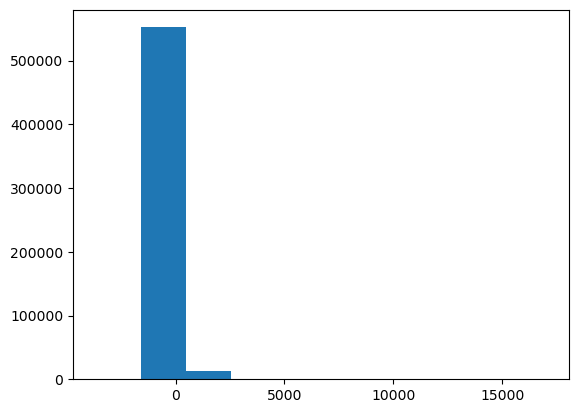

In [40]:
plt.hist(z_final)

In [ ]:
keys = ("sat_id", "tree_id", "SAGA_id", "Nsub", "M_acc", "z_acc", "M_final", "R(kpc)", "phi(rad)", "z(kpc)", "k_acc", "k_final")

In [ ]:
data = Table([sat_id, tree_id, SAGA_id, Nsub, M_acc, z_acc], names=("sat_id", "tree_id", "SAGA_id", "Nsub", "M_acc", "z_acc"))
data.write("../../data/MW-analog/101_SAGA_samples.dat", format="ascii")


In [ ]:
def plot_single_realization(file, nhalo=100):

    tree = np.load(file)

    mass = tree["mass"]
    time = tree["CosmicTime"]

    colors = cm.viridis(np.linspace(0, 1, nhalo))

    plt.figure(figsize=(6,6))

    for i in range(nhalo):
        plt.plot(time, mass[i+100], color=colors[i])

    plt.plot(time, mass[0], color="red")
    plt.xlabel("Gyr", fontsize=15)
    plt.ylabel("halo mass (M$_{\odot}$)", fontsize=15)
    plt.yscale("log")
    plt.axhline(10**8, ls="--", color="black")
    #plt.ylim(1e6,1e14)
    plt.show()

In [ ]:
#plot_single_realization("../../data/test_evo/tree_2257_evo.npz")

In [ ]:
# jsm_serial.evolve("../../data/test_evo/mass_res/", evo_mode="arbres")

In [ ]:
well = jsm_halopull.Realizations("../../data/test_evo/mass_res/", 1e8)
well.grab_mass()

well.files

In [ ]:
mass = np.load("../../data/test_evo/mass_res/acc_mass.npy")
red = np.load("../../data/test_evo/mass_res/acc_redshift.npy")
surv_mask = np.load("../../data/test_evo/mass_res/surv_mask.npy")

In [ ]:
surv_mass = np.ma.filled(np.ma.masked_array(mass, mask=~surv_mask),fill_value=np.nan)
zero_mask = np.argwhere(np.isnan(surv_mass).all(axis=1)).flatten() # to fix the dead runs
surv_mass = np.delete(surv_mass, zero_mask, axis=0)
red = np.delete(red, zero_mask, axis=0)

In [ ]:
np.sum(~np.isnan(surv_mass),axis=1)

In [ ]:
wow = Table.read("../../../Downloads/Raw_Data.dat", format="ascii")
wow

In [ ]:
plt.scatter(np.log10(wow["col3"]), wow["col5"])

In [ ]:
trees, counts = np.unique(wow["col1"].value, return_counts=True)

lists = []
for i in range(100):
    index = np.where(wow["col1"] == trees[i])[0]
    lists.append(index)

lgMhs = []
lgMss = []
for i in lists:
    lgMhs.append(np.log10(wow["col3"][i].value))
    lgMss.append(wow["col5"][i].value)

In [ ]:
from itertools import islice, repeat, chain


def pad(x):
    zeros = repeat(0)
    n = max(map(len, x))
    return [list(islice(chain(row, zeros), n)) for row in x]

In [ ]:
lgMh = np.array(pad(lgMhs))
lgMs = np.array(pad(lgMss))
np.save("../../data/MCMC/SAGA_0_lgMh.npy", lgMh)
np.save("../../data/MCMC/SAGA_0_lgMs.npy", lgMs)

In [ ]:
hmm = jsm_stats.SatStats(lgMs)
hmm.Nsat(6.5, plot=True)
hmm.Maxmass(plot=True)

In [ ]:
final_step = Table.read("../../../Downloads/MCMC_step_1000.dat", format="ascii")
alphas = final_step["col1"].data
deltas = final_step["col2"].data
sigmas = final_step["col3"].data

last_sample_F = np.array([alphas, deltas, sigmas]).T
last_sample_F

In [ ]:
samples = np.load("../../data/MCMC/sampler_results_sep17.npy")
last_sample = samples[-1,:,:]
fig = corner.corner(last_sample_F, show_titles=True, quantiles=[0.16, 0.5, 0.84], plot_contours=False, range=[(0, 5), (-2, 2), (0, 3)])
fig = corner.corner(last_sample, show_titles=True, quantiles=[0.16, 0.5, 0.84], plot_contours=False)
figure = corner.corner(last_sample_F, plot_contours=False, range=[(0, 5), (-2, 2), (0, 3)])
corner.corner(last_sample, fig=figure, color='red', plot_contours=False, range=[(0, 5), (-2, 2), (0, 3)])
plt.show()

names = ['alpha', 'delta', 'sigma']

# Labels for the different chains
chainLabels = ["JSM results", "F vdB results"]

# List of Gaussian curves to plot
#(to represent priors): mean, width
# Empty () or None if no prior to plot
priors = ((1, 3), (-2, 1), (0, 3))

truths = [1.9, -0.2, 0.6]

GTC = pygtc.plotGTC(chains=[last_sample,last_sample_F], 
                    paramNames=names,
                    chainLabels=chainLabels,
                    truths=truths,
                    figureSize=8,
                    filledPlots=True)

